In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

from ff_energy.uncertainty.uncertainty_quantifier import UncertaintyQuantifier
from ff_energy.ffe.constants import FFEPATH
print(FFEPATH)

csv = FFEPATH / "datasets/silvan/criegee_mp2_avtz_gen3_randomselection_4305_ens6_all.dat"
print(csv)

/home/boittier/Documents/phd/ff_energy
/home/boittier/Documents/phd/ff_energy/datasets/silvan/criegee_mp2_avtz_gen3_randomselection_4305_ens6_all.dat


In [2]:
df = pd.read_csv(csv, delimiter="  ")

/tmp/ipykernel_197809/1288098332.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv, delimiter="  ")


In [3]:
df

,Eref,Ens,Model1,Model2,Model3,Model4,Model5,Model6
0,-30.302610,-30.303969,-30.304491,-30.304039,-30.303816,-30.302113,-30.304005,-30.305349
1,-29.555629,-29.556528,-29.553324,-29.556776,-29.560293,-29.550920,-29.560108,-29.557745
2,-28.771974,-28.771562,-28.760334,-28.771938,-28.784126,-28.766819,-28.775587,-28.770569
3,-28.264171,-28.267426,-28.245617,-28.263954,-28.294741,-28.272991,-28.266968,-28.260286
4,-28.074606,-28.091652,-28.057587,-28.087101,-28.126707,-28.107737,-28.098137,-28.072643
...,...,...,...,...,...,...,...,...
33397,-29.668227,-29.669304,-29.667955,-29.669159,-29.670647,-29.668480,-29.672123,-29.667458
33398,-29.431993,-29.432835,-29.433363,-29.432831,-29.431156,-29.433653,-29.436811,-29.429195
33399,-29.002758,-29.006098,-29.007973,-29.004765,-29.003111,-29.010780,-29.007494,-29.002464
33400,-28.620107,-28.628448,-28.628874,-28.625696,-28.629385,-28.635044,-28.623213,-28.628475


In [4]:
# from ff_energy.uncertainty.plotter import corrfunc
    
# graph = sns.pairplot(df, x_vars=["Ens", "Model1", "Model2", "Model3", "Model4", "Model5", "Model6", ], 
#                      y_vars=["Eref"], palette="husl", plot_kws={"alpha": 0.2});
# graph.map(corrfunc)

In [35]:
uq_ = UncertaintyQuantifier(df)

In [36]:
# uq_.calculate_uncertainty(keys=["mapie_uncertainty"])
uq_.calculate_uncertainty(keys=["conformal_uncertainty"])

X (33402, 13)
y (33402,)
residuals (33402,)
std ()
test_std (6681,)
train_std (26721,)
y_train (26721,)
y_test (6681,)
y_pred (26721,)
y_test_pred (6681,)
X_train (26721,)
X_test (6681,)
val_targets (26721, 1)
[[-28.80631661]
 [-17.31708747]
 [-28.62072626]
 ...
 [-28.66656535]
 [-27.59023394]
 [-27.08496714]]
val_uncertainties (26721, 1)
[[0.07613148]
 [0.07613148]
 [0.07613148]
 ...
 [0.07613148]
 [0.07613148]
 [0.07613148]]
val_preds (26721, 1)
[[-28.80648708]
 [-17.57630189]
 [-28.62705739]
 ...
 [-28.67916457]
 [-27.59018707]
 [-27.13118235]]
test_uncertainties (6681, 1)
[[0.07983325]
 [0.07983325]
 [0.07983325]
 ...
 [0.07983325]
 [0.07983325]
 [0.07983325]]
test_preds (6681, 1)
[[-28.26417121]
 [-28.07460639]
 [-27.95105392]
 ...
 [-27.77348315]
 [-29.34550772]
 [-29.0027583 ]]


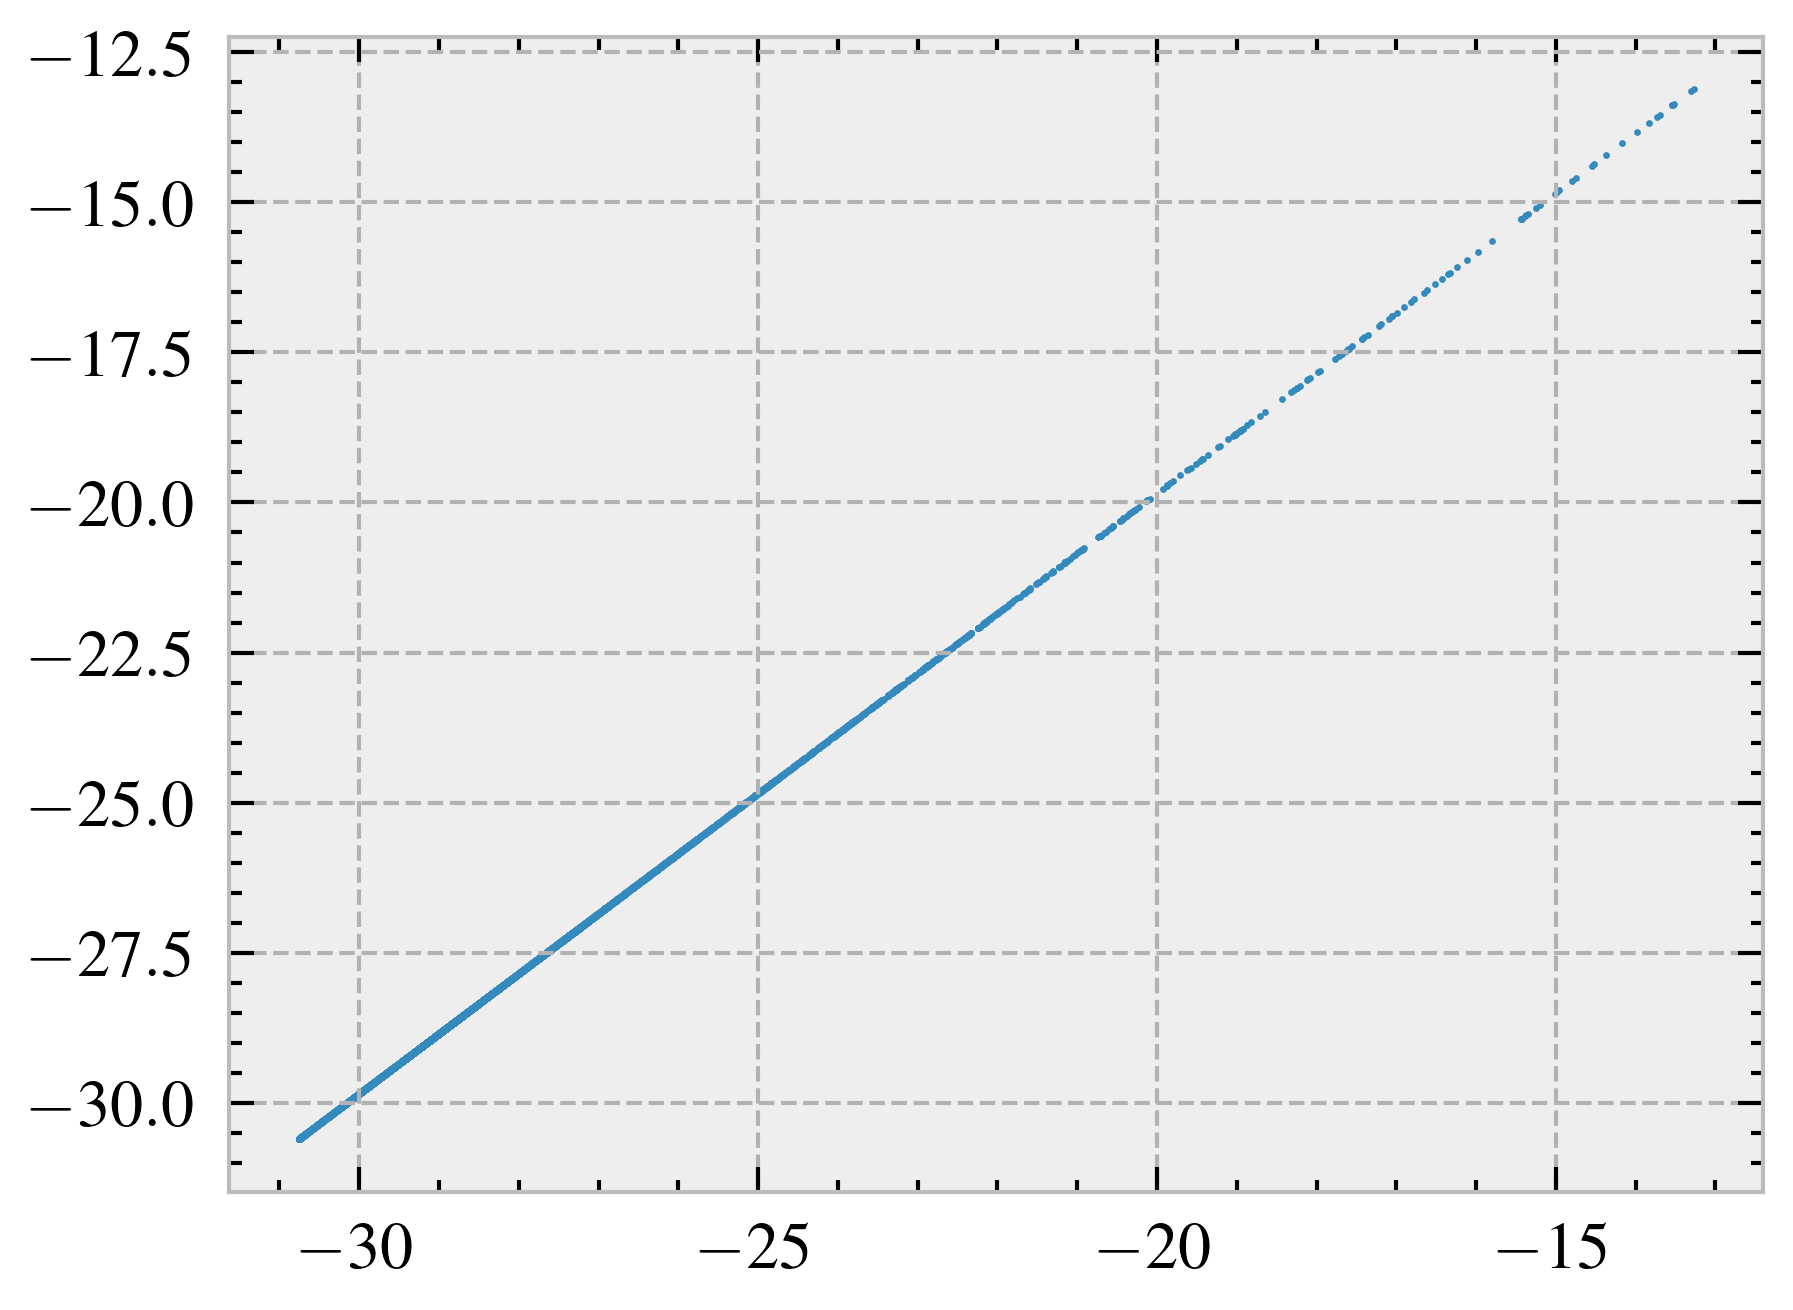

In [42]:
plt.scatter(*uq_.conformal_uncertainty.T, s=0.1)

In [ ]:
uq_.output_dict

In [ ]:
uq_